In [1]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
from pylab import mpl
import seaborn as sns
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D
from numpy import random
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
%matplotlib inline

In [4]:
iris_df = pd.read_csv("iris.csv")
iris_df['Species'], indexer=pd.factorize(iris_df['Species'])
train_df= iris_df[0:100]
train_df = train_df.filter(regex='Petal.Length|Species')
train_np = np.array(train_df)
y_iris = train_np[:, 1]
X_iris = train_np[:, 0]
y_iris = y_iris.reshape(-1,1)
x_0 = np.ones((100, 1))
X_new = np.column_stack((x_0,X_iris))

In [6]:
def sigmoid(z): # 输出shape(m ,1)
    out = 1 / (1 + np.exp(-z))
    return np.around(out.reshape(-1,1),decimals=5)
nums = np.arange(-10, 10, step=1) 
# fig1, ax1 = plt.subplots(figsize=(12,4))
# ax1.plot(nums, sigmoid(nums), 'r')
sig = sigmoid(nums)


In [57]:
def model(X,theta):
    return sigmoid(X.dot(theta))
theta = np.array([1,1]).reshape(2,1)
mod = model(X_new,theta)


array([[0.91683],
       [0.91683],
       [0.90888],
       [0.92414],
       [0.91683],
       [0.93703],
       [0.91683],
       [0.92414],
       [0.91683],
       [0.92414],
       [0.92414],
       [0.93086],
       [0.91683],
       [0.8909 ],
       [0.90025],
       [0.92414],
       [0.90888],
       [0.91683],
       [0.93703],
       [0.92414],
       [0.93703],
       [0.92414],
       [0.8808 ],
       [0.93703],
       [0.94785],
       [0.93086],
       [0.93086],
       [0.92414],
       [0.91683],
       [0.93086],
       [0.93086],
       [0.92414],
       [0.92414],
       [0.91683],
       [0.92414],
       [0.90025],
       [0.90888],
       [0.91683],
       [0.90888],
       [0.92414],
       [0.90888],
       [0.90888],
       [0.90888],
       [0.93086],
       [0.94785],
       [0.91683],
       [0.93086],
       [0.91683],
       [0.92414],
       [0.91683],
       [0.99667],
       [0.99593],
       [0.99727],
       [0.99331],
       [0.99632],
       [0.

In [11]:
def cost_func(X, y, theta0,theta1): #逻辑回归交叉熵损失函数， 输出shape(1 ,1)
    theta = np.array([theta0,theta1]).reshape(2,1)
    left = np.multiply(-y, np.log(model(X, theta)))
    right = np.multiply(1 - y, np.log(1 - model(X, theta)))
    left_nan = np.isnan(left)
    right_nan = np.isnan(right)
    left_inf = np.isposinf(left)
    right_neginf = np.isneginf(right)
    left[left_nan] = 0
    right[right_nan] = 0
    left[left_inf] = 5000
    right[right_neginf] = -5000
    out = np.sum(left - right) / (len(X))
    return out.reshape(1,1)
cost_test = cost_func(X_new,y_iris,1,1)
cost_test

array([[1.27536269]])

In [12]:
def gradient(X, y, theta0,theta1): #逻辑回归的梯度， 输出shape(2 ,1)
    theta = np.array([theta0,theta1]).reshape(2,1)
    grad = np.ones(theta.shape).reshape(2,1)# 创建一个2个元素的theta
    error = model(X, theta)- y# error指-(y-h(Theta(Xi)))
    for j in range(len(grad)): #for each parmeter 对于向量中的每一个元素
        term = np.multiply(error, X[:,j].reshape(-1,1)) #term=error[i]*X[i,j],q其中j是固定的，也就是说i号元素对应相乘
        grad[j,0] = np.sum(term) /  len(X)#i元素再相加求和
    return grad
grad_test = gradient(X_new,y_iris,1,1)

(2, 1)

In [29]:
def gradient_descent(X, y, alpha):# 逻辑回归的梯度下降
    sample_num, dim = X.shape
    theta0_init = np.random.uniform(-25,-15)
    theta1_init = np.random.uniform(25,35)
    theta0_list = [theta0_init]#θ的初始化
    theta1_list = [theta1_init]
    theta = np.array([theta0_init,theta1_init]).reshape(2,1)
    print("theta初始值:",theta)
    cost_init = cost_func(X, y,theta0_init,theta1_init)
    print("cost初始值:",cost_init)
    cost_list = [cost_init]
    grad = gradient(X, y,theta0_init,theta1_init)
    while not np.all(np.absolute(grad) <= 1e-5):
        theta = theta - alpha * grad
        grad = gradient(X, y,theta[0,0],theta[1,0])
        theta0_list.append(theta[0,0])
        theta1_list.append(theta[1,0])
        cost = cost_func(X, y,theta[0,0],theta[1,0])
        cost_list.append(cost.flatten())
    theta0_np = np.array(theta0_list)
    theta1_np = np.array(theta1_list)
    cost_np = np.array(cost_list)
    cost_np = cost_np.flatten()
    return theta,theta0_np,theta1_np,cost_np

opt_test,theta0_test,theta1_test,cost_test = gradient_descent(X_new,y_iris,0.4)
opt_test



theta初始值: [[-22.84555923]
 [ 34.81562031]]
cost初始值: [[2450.11512925]]


C:\Users\lsx55\.conda\envs\sanjieke\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\lsx55\.conda\envs\sanjieke\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
C:\Users\lsx55\.conda\envs\sanjieke\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lsx55\.conda\envs\sanjieke\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-35.67834455],
       [ 14.67017022]])

In [118]:
cost_test[-1]

1.1401977505811041e-05

C:\Users\lsx55\.conda\envs\sanjieke\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lsx55\.conda\envs\sanjieke\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lsx55\.conda\envs\sanjieke\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\lsx55\.conda\envs\sanjieke\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


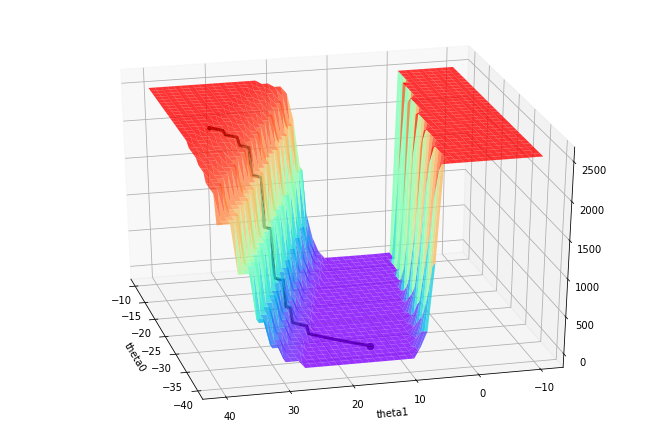

In [117]:
#逻辑回归使用交叉熵损失函数
fig1 = plt.figure(figsize=(9,6))
ax1 = Axes3D(fig1)
theta0_iris, theta1_iris = np.meshgrid(np.linspace(-40, -10, 30), np.linspace(-10, 40, 50))  # parameter space
cost_iris = np.array([cost_func(X_new,y_iris,a_,b_) for a_, b_ in zip(theta0_iris.flatten(), theta1_iris.flatten())]).reshape(theta0_iris.shape)
ax1.plot_surface(theta0_iris, theta1_iris, cost_iris, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'), alpha=0.8)
ax1.set_xlabel('theta0')
ax1.set_ylabel('theta1')
ax1.scatter(theta0_test[0], theta1_test[0], zs=cost_test[0], s=10, c='black')
ax1.scatter(theta0_test[-1], theta1_test[-1], zs=cost_test[-1], s=40, c='black')
ax1.plot(theta0_test, theta1_test, cost_test, zdir='z', c='black', lw=3)
ax1.view_init(28, 166)
plt.show()

In [49]:
#逻辑回归模型使用均方误差和作为损失函数
def cost_func2(X, y, theta0,theta1): # 输出shape(1 ,1)
    theta = np.array([theta0,theta1]).reshape(2,1)    
    diff = model(X,theta)-y
    out = np.sum(diff**2) / (len(X)*2)
    return out.reshape(1,1)
cost_test2 = cost_func2(X_new,y_iris,1,1)
cost_test2

array([[0.21189713]])

In [69]:
def gradient_func_mse(X, y,theta0,theta1):# 逻辑回归使用均方误差和的梯度
    sample_num, dim = X.shape
    theta = np.array([theta0,theta1]).reshape(2,1)
    grad = np.ones(theta.shape).reshape(2,1)# 创建一个2个元素的theta
    diff = model(X,theta) - y
    h_grad = np.multiply(model(X,theta),1-model(X,theta))
    med_value = np.multiply(diff,h_grad)
    for j in range(len(grad)): #for each parmeter 对于向量中的每一个元素
        term = np.multiply(med_value, X[:,j].reshape(-1,1)) 
        grad[j,0] = np.sum(term) /  len(X)#i元素再相加求和
    return grad
    
gfm = gradient_func_mse(X_new,y_iris,1,1)
gfm

array([[0.03350799],
       [0.04819354]])

In [99]:
def gradient_descent_mse(X, y, alpha):# 逻辑回归使用均方误差和的梯度下降
    sample_num, dim = X.shape
    theta0_init = np.random.uniform(20,30)
    theta1_init = np.random.uniform(-20,0)
    theta0_list = [theta0_init]#θ的初始化
    theta1_list = [theta1_init]
    theta = np.array([theta0_init,theta1_init]).reshape(2,1)
    print("theta初始值:",theta)
    cost_init = cost_func2(X, y,theta0_init,theta1_init)
    print("cost初始值:",cost_init)
    cost_list = [cost_init]
    grad = gradient_func_mse(X, y,theta0_init,theta1_init)
    while not np.all(np.absolute(grad) <= 1e-5):
        theta = theta - alpha * grad
        grad = gradient_func_mse(X, y,theta[0,0],theta[1,0])
        theta0_list.append(theta[0,0])
        theta1_list.append(theta[1,0])
        cost = cost_func2(X, y,theta[0,0],theta[1,0])
        cost_list.append(cost.flatten())
    theta0_np = np.array(theta0_list)
    theta1_np = np.array(theta1_list)
    cost_np = np.array(cost_list)
    cost_np = cost_np.flatten()
    return theta,theta0_np,theta1_np,cost_np

opt_mse,theta0_mse,theta1_mse,cost_mse = gradient_descent_mse(X_new,y_iris,0.4)
opt_mse

theta初始值: [[ 27.31214471]
 [-16.78281098]]
cost初始值: [[0.43313154]]


array([[ 20.91689014],
       [-24.32655277]])

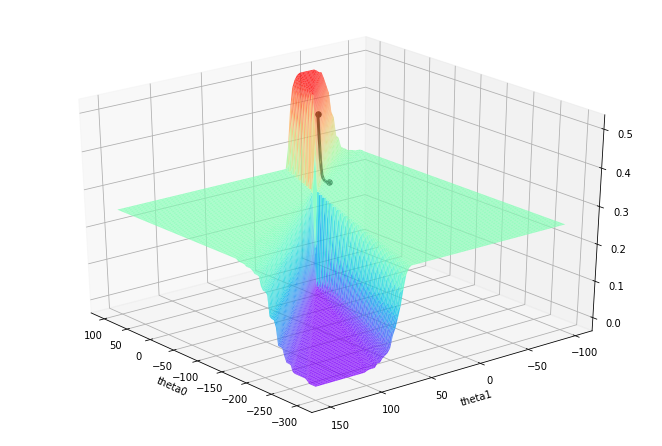

In [114]:
#逻辑回归使用均方误差和作为损失函数
fig2 = plt.figure(figsize=(9,6))
ax2 = Axes3D(fig2)
ax2.plot(theta0_mse, theta1_mse, cost_mse, zdir='z', c='black', lw=3)
theta0_iris_mse, theta1_iris_mse = np.meshgrid(np.linspace(-300, 100, 100), np.linspace(-100, 150, 100))  # parameter space
cost_iris_mse = np.array([cost_func2(X_new,y_iris,a_,b_) for a_, b_ in zip(theta0_iris_mse.flatten(), theta1_iris_mse.flatten())]).reshape(theta0_iris_mse.shape)
ax2.plot_surface(theta0_iris_mse, theta1_iris_mse, cost_iris_mse, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'), alpha=0.8)
ax2.set_xlabel('theta0')
ax2.set_ylabel('theta1')
ax2.scatter(theta0_mse[0], theta1_mse[0], zs=cost_mse[0], s=30, c='black')
ax2.scatter(theta0_mse[-1], theta1_mse[-1], zs=cost_mse[-1], s=30, c='black')

ax2.view_init(28, 141)
plt.show()